In [46]:

import os 
import json
import pandas as pd 
import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn import metrics    
# from sklearn.metrics import classification_report
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score # 정확도 함수
import matplotlib.pyplot as plt
import datetime
# import time
from wordcloud import WordCloud

In [ ]:
# category
# title
# article

#판매 교환 구입 거래완료 그냥드림

In [3]:
def categoryToTarget(text):
    if text == "판매":
        return 1
    elif text == "교환":
        return 2
    elif text == "구입":
        return 3
    elif text == "거래완료":
        return 4
    elif text == "그냥드림":
        return 5
    else:
        return 100
    

In [6]:
#데이터 가져오기
DATA_IN_PATH = './data/clienSample/'
fileList = os.listdir(DATA_IN_PATH)

data = pd.DataFrame()
# data = pd.DataFrame(columns=["title","article"])
# targetData = pd.DataFrame(columns=["category"])

for fileName in fileList:
    print(fileName)
    if fileName == ".DS_Store":
        continue
    with open(DATA_IN_PATH + fileName, 'r') as f:
        json_data = json.load(f)
        

    for document in json_data:
        documentDataFrame = pd.DataFrame.from_dict([{
            "title":document['title'],
            "article":document['article'],
            "category":document['category'],
            "category_to_target":categoryToTarget(document['category']),
            "collectDate":document['collectDate'],            
            "registerDate":document['registerDate'],            
        }])
#         articleDataFrame = pd.DataFrame.from_dict([{"title":document['title'],"article":document['article']}])
#         targetDataFrame = pd.DataFrame.from_dict([{"category":categoryToTarget(document['category'])}])

        data = data.append(documentDataFrame)
#         targetData = targetData.append(targetDataFrame)

    

    




20210803_clien
20210728_clien
20210715_clien
20210731_clien
20210717_clien
20210801_clien
20210713_clien
20210805_clien
.DS_Store
20210708_clien
20210807_clien
20210711_clien
20210716_clien
20210714_clien
20210802_clien
20210729_clien
20210730_clien
20210709_clien
20210710_clien
20210806_clien
20210804_clien
20210712_clien
20210707_clien
20210723_clien
20210721_clien
20210705_clien
20210701_clien
20210725_clien
20210718_clien
20210727_clien
20210703_clien
20210720_clien
20210704_clien
20210706_clien
20210722_clien
20210726_clien
20210702_clien
20210719_clien
20210724_clien


In [7]:
# print(data.head())
print(data['category_to_target'].value_counts() )

print(data['registerDate'].head )

1    6762
3     358
2     109
5      26
4       2
Name: category_to_target, dtype: int64
<bound method NDFrame.head of 0    2021-08-03 00:01:56
0    2021-08-03 00:00:44
0    2021-08-03 00:07:42
0    2021-08-03 00:16:55
0    2021-08-03 00:27:18
            ...         
0    2021-07-24 23:34:03
0    2021-07-24 23:40:19
0    2021-07-24 23:39:32
0    2021-07-24 23:46:31
0    2021-07-24 23:53:55
Name: registerDate, Length: 7257, dtype: object>


In [9]:
# print(data['registerDate'].iloc[3][:7])
data['day']  = data['registerDate'].map(lambda x : x[:10])
data['month']  = data['registerDate'].map(lambda x : x[:7])


print(data.iloc[99])
# print(data.head())



title                         오클리 엔듀로 (ENDURO) 스모크 그레이 아시안핏 (OO9274-06)
article               한해 두해 나이먹어 가며 선글라스를 거의 안쓰게 되어서 판매합니다.\n매우 깨끗한 ...
category                                                             판매
category_to_target                                                    1
collectDate                                    {'$date': 1628011408743}
registerDate                                        2021-08-03 17:20:33
day                                                          2021-08-03
month                                                           2021-08
Name: 0, dtype: object


In [10]:
print(data.groupby(['day','category_to_target']).size())

day         category_to_target
2021-06-30  1                       1
2021-07-01  1                     260
            2                       9
            3                      10
            4                       2
                                 ... 
2021-08-06  1                     142
            2                       1
            3                       9
2021-08-07  1                     141
            3                       9
Length: 127, dtype: int64


<AxesSubplot:xlabel='day,category_to_target'>

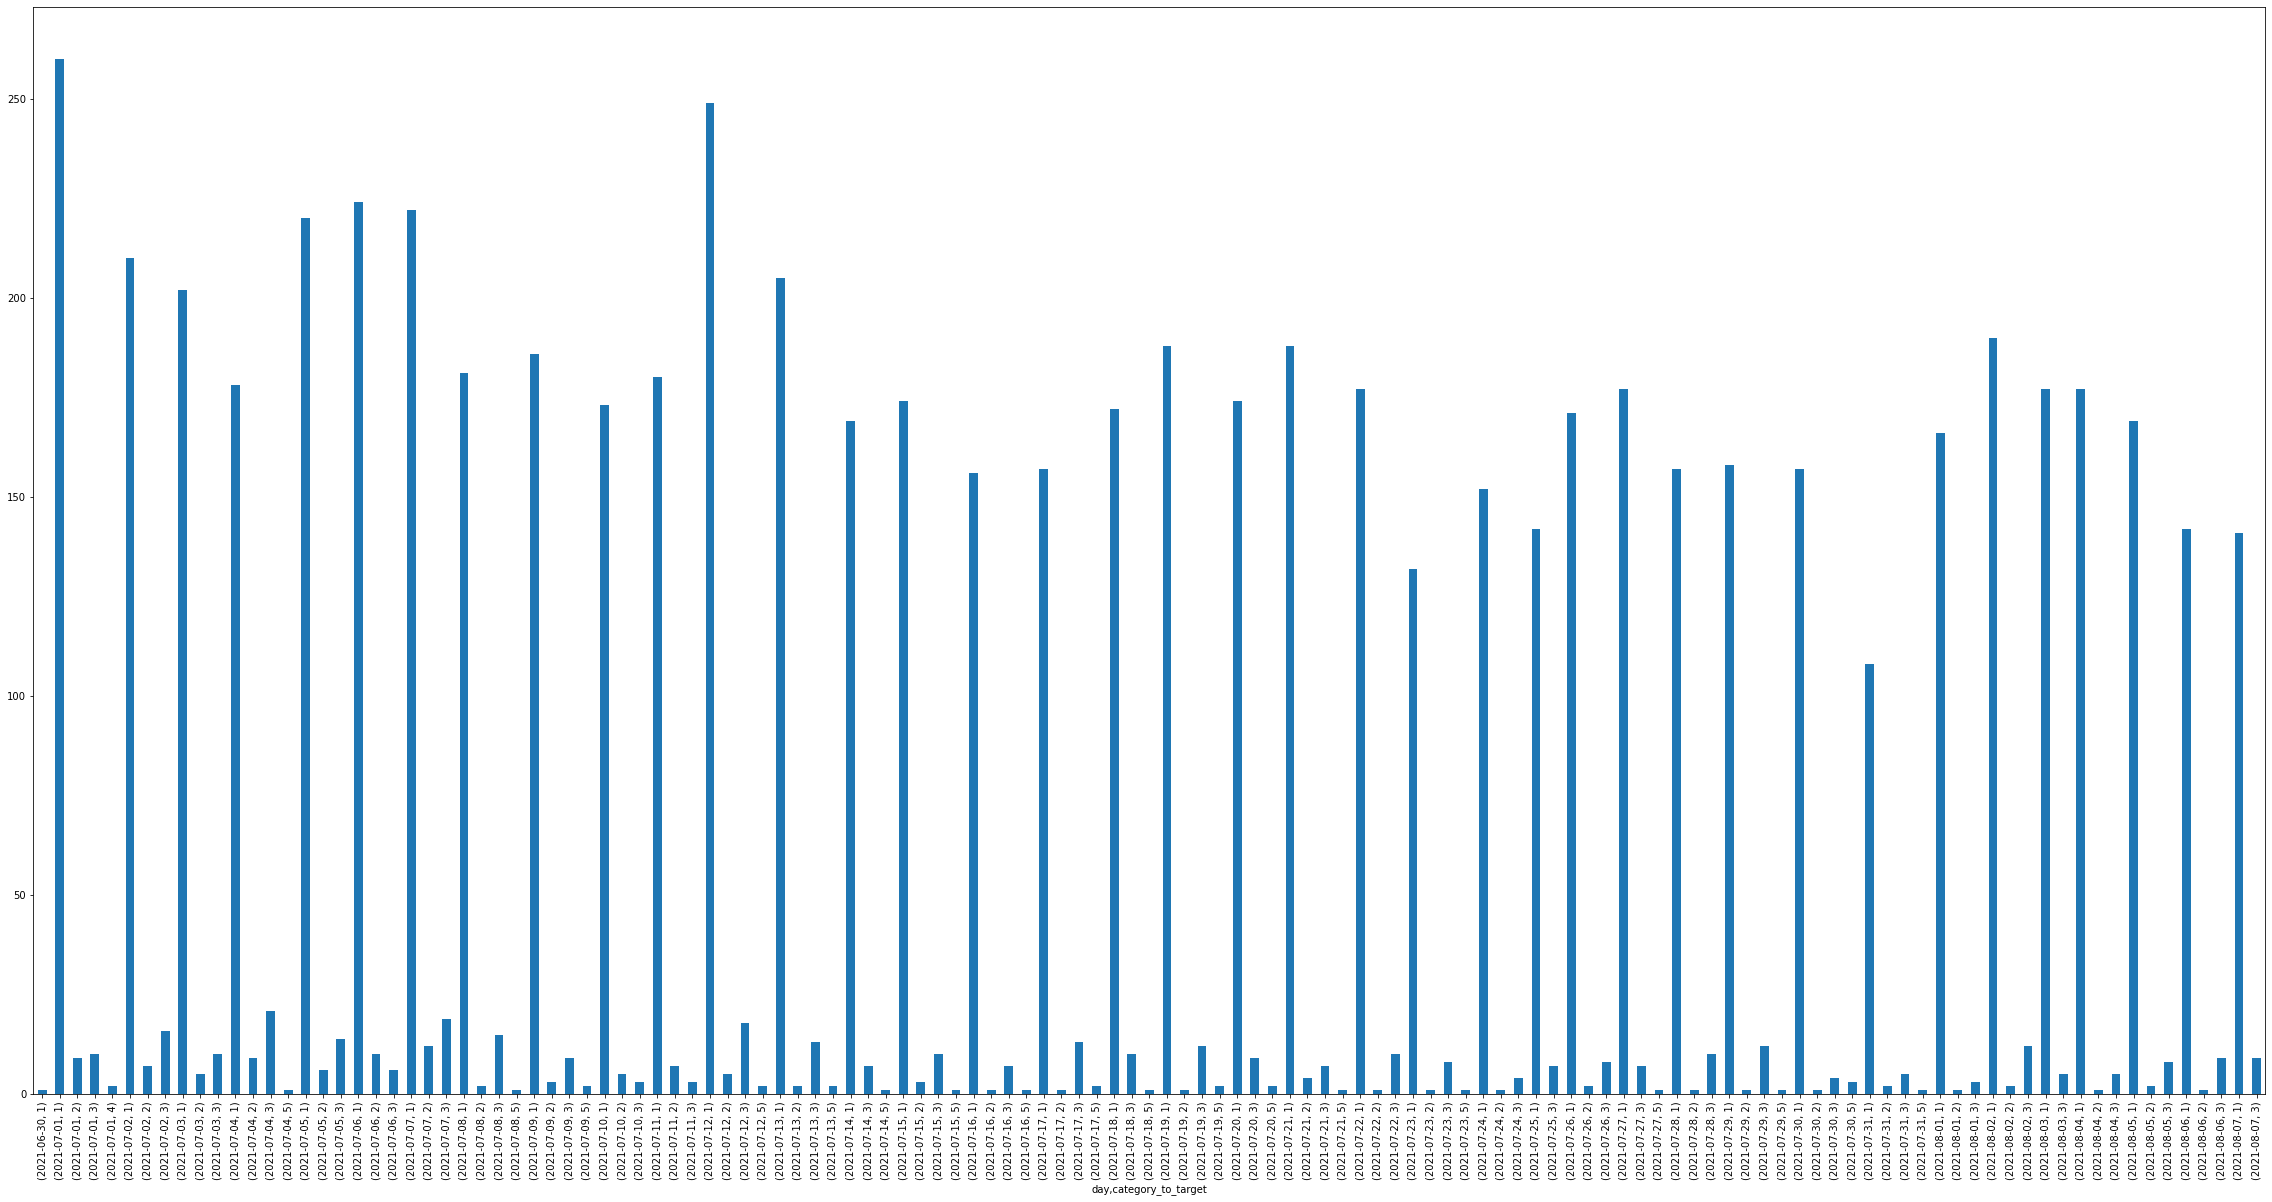

In [11]:
# print(data['day'].iloc[20000])
# print(data.groupby(['day','category_to_target']).size() )
# data.groupby(['day','category_to_target']).size().plot.bar()
# print(data.groupby(['day','category_to_target']).size() )
plt.figure(figsize=(40, 20))
# data.groupby(['month','category_to_target']).size().plot.bar(color=["r","b","g","c","m"])
data.groupby(['day','category_to_target']).size().plot.bar()


# print(data['day'].value_counts() )


In [23]:
print(data.head())
print(data.groupby(['day','category_to_target']).size())

print(data.groupby(['day','category_to_target']).size()['2021-06-30'][1],'---')
print(data.groupby(['day','category_to_target']).size()['2021-06-30'],'---')
print(data.groupby(['day','category_to_target']).size()[1],'---')

                                      title  \
0    아이패드 프로 5세대 12.9 512G WIFI 스그 130만에 판매   
0                   아이패드 11인치용 매직키보드 배대지 판매   
0  갤럭시 워치 액티브 2 / 44mm / Silver / Stainless   
0            갤럭시 탭 S7+ Silver / LTE / 256GB   
0                    몽블랑 마에스터 스튁 반지갑 & 카드지갑   

                                             article category  \
0  아이패드 프로 5세대 12.9 512G WIFI 스그 판매합니다\n\n몇번 쓰다가 ...       판매   
0  월마트 직구가 어렵다길래....월마트 구매 후 아마존에서 추가로 구매 했는데...\...       판매   
0  갤럭시 워치 액티브 2 팝니다. \n\n44mm / Silver / Stainles...       판매   
0  갤럭시 탭 S7+ 팝니다.\n\n Silver / LTE / 256GB 이며 현재 ...       판매   
0  마에스터 스튁 6cc 반지갑 - 11만\n\n\n\n\n\n\n\n\n\n\n\n\...       판매   

   category_to_target               collectDate         registerDate  \
0                   1  {'$date': 1627948991690}  2021-08-03 00:01:56   
0                   1  {'$date': 1627948992524}  2021-08-03 00:00:44   
0                   1  {'$date': 1627949291570}  2021-08-03 00:07:42   
0                   1  {'$date': 16279

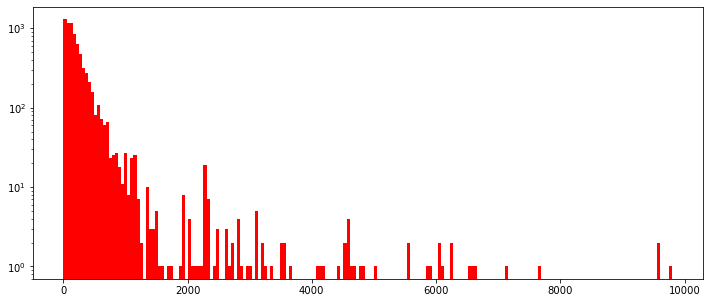

본문 길이 9801
본문 3
본문 평균 258.7284001653576
본문 3
본문 표준편차 496.5430312711246
본문 중간값 149.0
본문 73.0
본문 277.0


In [39]:
#문자열 길이
articleLenght = data['article'].astype(str).apply(len)
# articleLenght.head()

plt.figure(figsize=(12,5))
plt.hist(articleLenght, bins=200, color='r',label='article')
plt.yscale('log', nonpositive='clip')
plt.show()

print('본문 길이', np.max(articleLenght))
print('본문', np.min(articleLenght))
print('본문 평균', np.mean(articleLenght))
print('본문', np.min(articleLenght))
print('본문 표준편차', np.std(articleLenght))
print('본문 중간값', np.median(articleLenght))
print('본문', np.percentile(articleLenght,25))
print('본문', np.percentile(articleLenght,75))

<function matplotlib.pyplot.show(close=None, block=None)>

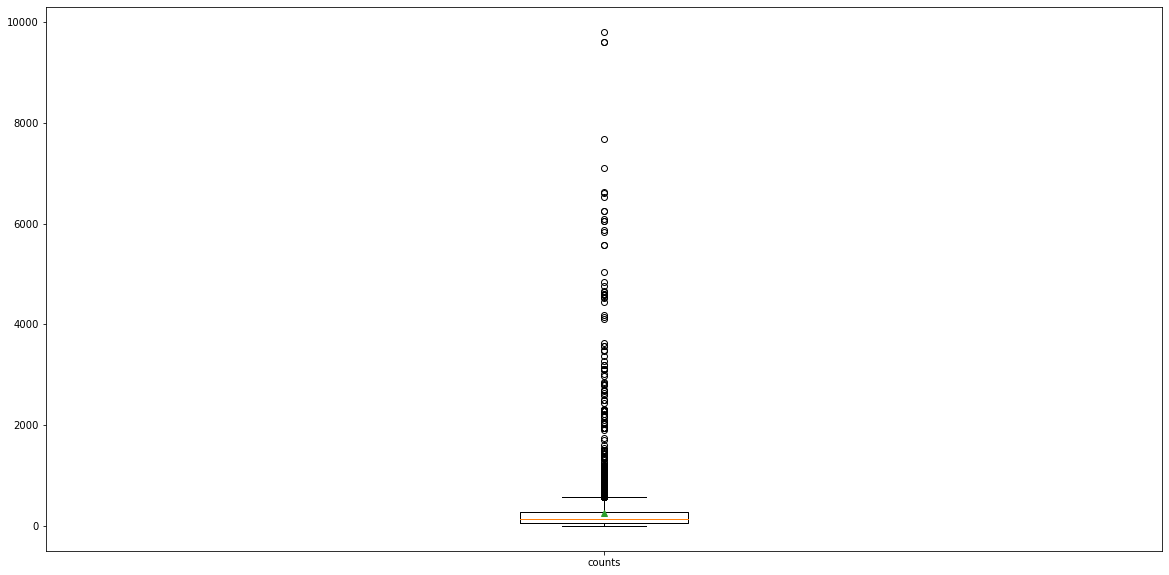

In [43]:
plt.figure(figsize=(20,10))
plt.boxplot(articleLenght, labels=['counts'], showmeans = True)
plt.show

(-0.5, 399.5, 199.5, -0.5)

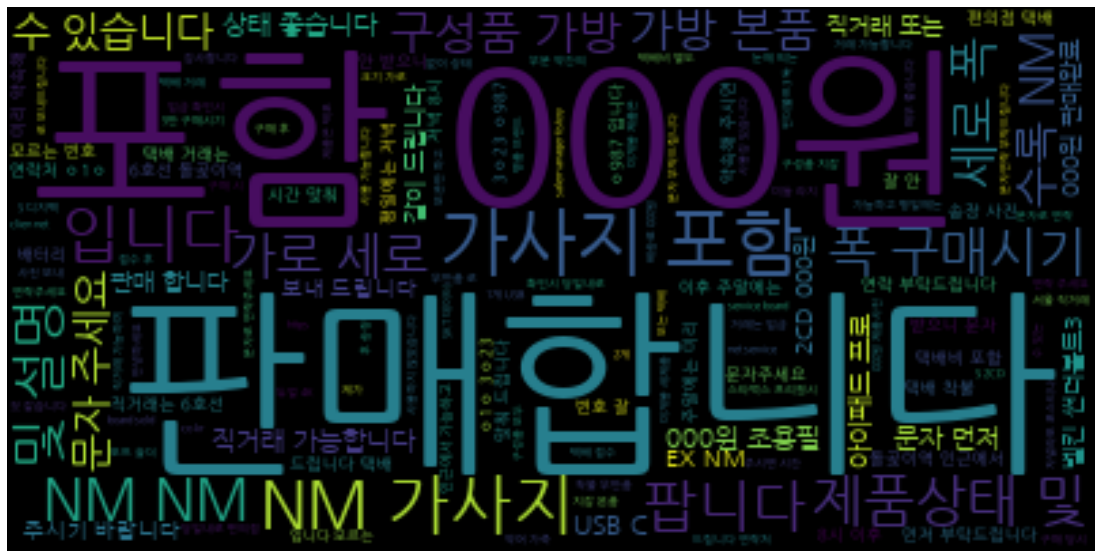

In [58]:
trainArticle = [article for article in data['article'] if type(article) is str]

matching = [s for s in trainArticle if "가사지" in s]

wordcloud = WordCloud(font_path="./NanumGothic.ttf").generate(' '.join(trainArticle))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.show()